In [225]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA
from sklearn import preprocessing, decomposition, datasets, cluster
from scipy.cluster import hierarchy


In [226]:
keepers = pd.read_html("https://fbref.com/en/comps/Big5/keepers/players/Big-5-European-Leagues-Stats", header=[1])
keepersadv = pd.read_html("https://fbref.com/en/comps/Big5/keepersadv/players/Big-5-European-Leagues-Stats", header=[1])
possession = pd.read_html("https://fbref.com/en/comps/Big5/possession/players/Big-5-European-Leagues-Stats", header=[1])
passing = pd.read_html("https://fbref.com/en/comps/Big5/passing/players/Big-5-European-Leagues-Stats", header=[1])

keepers_df = keepers[0]
keepersadv_df = keepersadv[0]
possession_df = possession[0]
passing_df = passing[0]

In [227]:
keepers_df = keepers_df[['Player', '90s', 'GA90', 'SoTA', 'Save%', 'CS%']]
keepersadv_df = keepersadv_df[['Player', '90s', 'FK', 'CK', 'OG', 'PSxG', 'PSxG/SoT', 'PSxG+/-', '/90', 'Cmp', 'Att', 'Cmp%', 'Att (GK)', 'Thr', 'Launch%', 'AvgLen', 'Att.1', 'Launch%.1', 'AvgLen.1', 'Opp', 'Stp', 'Stp%', '#OPA', '#OPA/90', 'AvgDist']]
possession_df = possession_df[['Player', '90s', 'Touches', 'Def Pen', 'Def 3rd', 'Mid 3rd', 'Att 3rd', 'Att Pen', 'Live', 'Carries', 'TotDist', 'PrgDist', 'PrgC', '1/3', 'CPA', 'Mis', 'Dis', 'Rec', 'PrgR']]
passing_df = passing_df[['Player', '90s', 'Cmp', 'Att', 'Cmp%', 'TotDist', 'PrgDist', 'Cmp.1', 'Att.1', 'Cmp%.1', 'Cmp.2', 'Att.2', 'Cmp%.2', 'Cmp.3', 'Att.3', 'Cmp%.3', 'Ast', 'xAG', 'xA', 'A-xAG', 'KP', '1/3', 'PPA', 'CrsPA', 'PrgP']]


In [228]:
keepers_df[[ '90s','GA90', 'SoTA', 'Save%', 'CS%']] = keepers_df[[ '90s','GA90', 'SoTA', 'Save%', 'CS%']].apply(pd.to_numeric, errors='coerce')
keepersadv_df[[  '90s','FK', 'CK', 'OG', 'PSxG', 'PSxG/SoT', 'PSxG+/-', '/90', 'Cmp', 'Att', 'Cmp%', 'Att (GK)', 'Thr', 'Launch%', 'AvgLen', 'Att.1', 'Launch%.1', 'AvgLen.1', 'Opp', 'Stp', 'Stp%', '#OPA', '#OPA/90', 'AvgDist']] = keepersadv_df[[ '90s', 'FK', 'CK', 'OG', 'PSxG', 'PSxG/SoT', 'PSxG+/-', '/90', 'Cmp', 'Att', 'Cmp%', 'Att (GK)', 'Thr', 'Launch%', 'AvgLen', 'Att.1', 'Launch%.1', 'AvgLen.1', 'Opp', 'Stp', 'Stp%', '#OPA', '#OPA/90', 'AvgDist']].apply(pd.to_numeric, errors='coerce')
possession_df[['Touches', '90s', 'Def Pen', 'Def 3rd', 'Mid 3rd', 'Att 3rd', 'Att Pen', 'Live', 'Carries', 'TotDist', 'PrgDist', 'PrgC', '1/3', 'CPA', 'Mis', 'Dis', 'Rec', 'PrgR']] = possession_df[['Touches', '90s', 'Def Pen', 'Def 3rd', 'Mid 3rd', 'Att 3rd', 'Att Pen', 'Live', 'Carries', 'TotDist', 'PrgDist', 'PrgC', '1/3', 'CPA', 'Mis', 'Dis', 'Rec', 'PrgR']].apply(pd.to_numeric, errors='coerce')
passing_df[[ '90s','Cmp', 'Att', 'Cmp%', 'TotDist', 'PrgDist', 'Cmp.1', 'Att.1', 'Cmp%.1', 'Cmp.2', 'Att.2', 'Cmp%.2', 'Cmp.3', 'Att.3', 'Cmp%.3', 'Ast', 'xAG', 'xA', 'A-xAG', 'KP', '1/3', 'PPA', 'CrsPA', 'PrgP']] = passing_df[[ '90s','Cmp', 'Att', 'Cmp%', 'TotDist', 'PrgDist', 'Cmp.1', 'Att.1', 'Cmp%.1', 'Cmp.2', 'Att.2', 'Cmp%.2', 'Cmp.3', 'Att.3', 'Cmp%.3', 'Ast', 'xAG', 'xA', 'A-xAG', 'KP', '1/3', 'PPA', 'CrsPA', 'PrgP']].apply(pd.to_numeric, errors='coerce')

<ipython-input-228-70f2c231a2ef>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  keepers_df[[ '90s','GA90', 'SoTA', 'Save%', 'CS%']] = keepers_df[[ '90s','GA90', 'SoTA', 'Save%', 'CS%']].apply(pd.to_numeric, errors='coerce')
<ipython-input-228-70f2c231a2ef>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  keepersadv_df[[  '90s','FK', 'CK', 'OG', 'PSxG', 'PSxG/SoT', 'PSxG+/-', '/90', 'Cmp', 'Att', 'Cmp%', 'Att (GK)', 'Thr', 'Launch%', 'AvgLen', 'Att.1', 'Launch%.1', 'AvgLen.1', 'Opp', 'Stp', 'Stp%', '#OPA',

In [229]:
keepers_df = keepers_df[keepers_df['90s'] >= keepers_df['90s'].mean()*0.5]
keepersadv_df = keepersadv_df[keepersadv_df['90s'] >= keepersadv_df['90s'].mean()*0.5]
possession_df = possession_df[possession_df['90s'] >= possession_df['90s'].mean()*0.5]
passing_df = passing_df[passing_df['90s'] >= passing_df['90s'].mean()*0.5]

In [230]:
def add_dataframe_indicator(df, indicator):
  """Adds a dataframe indicator to numeric column names."""
  numeric_cols = df.select_dtypes(include=np.number).columns
  new_cols = {col: f"{col}_{indicator}" for col in numeric_cols}
  df = df.rename(columns=new_cols)
  return df

keepers_df = add_dataframe_indicator(keepers_df, "keepers")
keepersadv_df = add_dataframe_indicator(keepersadv_df, "keepersadv")
possession_df = add_dataframe_indicator(possession_df, "possession")
passing_df = add_dataframe_indicator(passing_df, "passing")

In [231]:
# prompt: join the 4 df on "Player"

df = keepers_df.merge(keepersadv_df, on='Player', how='inner')
df = df.merge(possession_df, on='Player', how='inner')
df = df.merge(passing_df, on='Player', how='inner')

In [232]:
df["SoTA_keepers"] = df["SoTA_keepers"] / df["90s_keepers"]
df["FK_keepersadv"] = df["FK_keepersadv"] / df["90s_keepersadv"]
df["CK_keepersadv"] = df["CK_keepersadv"] / df["90s_keepersadv"]
df["OG_keepersadv"] = df["OG_keepersadv"] / df["90s_keepersadv"]
df["Cmp_keepersadv"] = df["Cmp_keepersadv"] / df["90s_keepersadv"]
df["Att_keepersadv"] = df["Att_keepersadv"] / df["90s_keepersadv"]
df["Att (GK)_keepersadv"] = df["Att (GK)_keepersadv"] / df["90s_keepersadv"]
df["Thr_keepersadv"] = df["Thr_keepersadv"] / df["90s_keepersadv"]
df["Att.1_keepersadv"] = df["Att.1_keepersadv"] / df["90s_keepersadv"]
df["Opp_keepersadv"] = df["Opp_keepersadv"] / df["90s_keepersadv"]
df["Stp_keepersadv"] = df["Stp_keepersadv"] / df["90s_keepersadv"]



df["Touches_possession"] = df["Touches_possession"] / df["90s_possession"]
df["Def Pen_possession"] = df["Def Pen_possession"] / df["90s_possession"]
df["Def 3rd_possession"] = df["Def 3rd_possession"] / df["90s_possession"]
df["Mid 3rd_possession"] = df["Mid 3rd_possession"] / df["90s_possession"]
df["Att 3rd_possession"] = df["Att 3rd_possession"] / df["90s_possession"]
df["Att Pen_possession"] = df["Att Pen_possession"] / df["90s_possession"]
df["Carries_possession"] = df["Carries_possession"] / df["90s_possession"]
df["PrgDist_possession"] = df["PrgDist_possession"] / df["90s_possession"]
df["TotDist_possession"] = df["TotDist_possession"] / df["90s_possession"]
df["PrgC_possession"] = df["PrgC_possession"] / df["90s_possession"]
df["1/3_possession"] = df["1/3_possession"] / df["90s_possession"]
df["CPA_possession"] = df["CPA_possession"] / df["90s_possession"]
df["Mis_possession"] = df["Mis_possession"] / df["90s_possession"]
df["Rec_possession"] = df["Rec_possession"] / df["90s_possession"]
df["PrgR_possession"] = df["PrgR_possession"] / df["90s_possession"]



df["TotDist_passing"] = df["TotDist_passing"] / df["90s_passing"]
df["PrgDist_passing"] = df["SoTA_keepers"] / df["90s_passing"]
df["Ast_passing"] = df["Ast_passing"] / df["90s_passing"]
df["A-xAG_passing"] = df["A-xAG_passing"] / df["90s_passing"]
df["KP_passing"] = df["KP_passing"] / df["90s_passing"]
df["1/3_passing"] = df["1/3_passing"] / df["90s_passing"]
df["PPA_passing"] = df["PPA_passing"] / df["90s_passing"]
df["CrsPA_passing"] = df["CrsPA_passing"] / df["90s_passing"]
df["PrgP_passing"] = df["PrgP_passing"] / df["90s_passing"]



#delete
df = df.drop(columns=['PSxG_keepersadv', 'PSxG/SoT_keepersadv', 'PSxG+/-_keepersadv',
                      'Live_possession', 'Cmp_passing', 'Att_passing', 'Cmp.1_passing', 'Att.1_passing',
                      'Cmp.2_passing', 'Att.2_passing', 'Cmp.3_passing', 'Att.3_passing', 'xAG_passing',
                      'xA_passing'])

In [233]:
df

,Player,90s_keepers,GA90_keepers,SoTA_keepers,Save%_keepers,CS%_keepers,90s_keepersadv,FK_keepersadv,CK_keepersadv,OG_keepersadv,...,Cmp%.1_passing,Cmp%.2_passing,Cmp%.3_passing,Ast_passing,A-xAG_passing,KP_passing,1/3_passing,PPA_passing,CrsPA_passing,PrgP_passing
0,Julen Agirrezabala,13.4,0.67,2.537313,76.5,35.7,13.4,0.149254,0.074627,0.000000,...,100.0,100.0,35.7,0.0,0.000000,0.000000,0.074627,0.000000,0.0,0.000000
1,Alisson,10.9,0.92,2.752294,66.7,36.4,10.9,0.000000,0.000000,0.000000,...,100.0,98.8,39.5,0.0,-0.055046,0.091743,0.458716,0.000000,0.0,0.000000
2,Alphonse Areola,10.1,2.27,5.346535,57.4,20.0,10.1,0.000000,0.198020,0.198020,...,100.0,95.9,50.8,0.0,0.000000,0.000000,0.495050,0.000000,0.0,0.000000
3,Kepa Arrizabalaga,14.0,1.29,4.857143,75.0,28.6,14.0,0.000000,0.071429,0.000000,...,95.0,97.2,51.9,0.0,0.000000,0.071429,0.285714,0.000000,0.0,0.000000
4,Noah Atubolu,13.0,1.62,4.846154,66.7,30.8,13.0,0.076923,0.076923,0.000000,...,98.7,98.6,50.0,0.0,0.000000,0.000000,0.769231,0.000000,0.0,0.076923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,Bart Verbruggen,18.0,1.56,4.333333,67.9,16.7,18.0,0.055556,0.166667,0.055556,...,99.4,99.2,50.2,0.0,0.000000,0.000000,0.277778,0.000000,0.0,0.000000
106,Guglielmo Vicario,12.0,1.08,3.416667,68.3,25.0,12.0,0.000000,0.166667,0.000000,...,99.3,98.3,55.4,0.0,0.000000,0.000000,0.083333,0.000000,0.0,0.083333
107,Timon Weiner,15.0,2.53,5.866667,61.4,6.7,15.0,0.066667,0.266667,0.066667,...,100.0,97.4,40.1,0.0,0.000000,0.000000,0.733333,0.000000,0.0,0.000000
108,Robin Zentner,15.0,1.33,4.533333,73.5,26.7,15.0,0.066667,0.200000,0.000000,...,100.0,99.3,40.6,0.0,-0.006667,0.133333,1.333333,0.133333,0.0,0.133333


PCA

In [234]:
df_players = df.drop(columns=['Player'])

df_players = df_players.replace([np.inf, -np.inf], np.nan)
df_players = df_players.fillna(0).astype(int)

# PCA
X_teams = df_players

# Standardisation
scaler = preprocessing.StandardScaler().fit(X_teams)
X_teams_scaled = scaler.transform(X_teams)

# PCA fit and transformation
pca = decomposition.PCA()
pca_values_teams = pca.fit_transform(X_teams_scaled)
pca_values_teams

array([[-2.09179128e+00, -2.37262615e+00,  1.55018192e+00, ...,
         1.35132440e-16,  1.71803507e-16, -5.39929481e-17],
       [ 3.14306545e+00, -5.36746208e+00,  4.01908506e-01, ...,
        -1.07398737e-17,  7.00713050e-17, -4.77374257e-18],
       [ 5.33433523e-01,  1.09707065e+00, -3.62109512e+00, ...,
        -4.50247541e-17, -3.05656064e-17,  2.21081740e-17],
       ...,
       [-3.03914190e+00,  2.35456893e+00, -2.43067811e+00, ...,
         2.51571997e-17,  8.95053738e-17, -6.00661483e-18],
       [-2.40459987e+00,  1.86771843e+00,  6.42620507e-01, ...,
         9.62718966e-17,  1.32262203e-16, -1.61780009e-17],
       [ 4.86428267e+00,  4.83807804e+00, -8.64603681e-01, ...,
         1.59638992e-16,  2.54899943e-16,  8.95707578e-19]])

<ipython-input-235-a77976993e05>:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([f"{round(tick*100)}%" for tick in ax.get_yticks()])


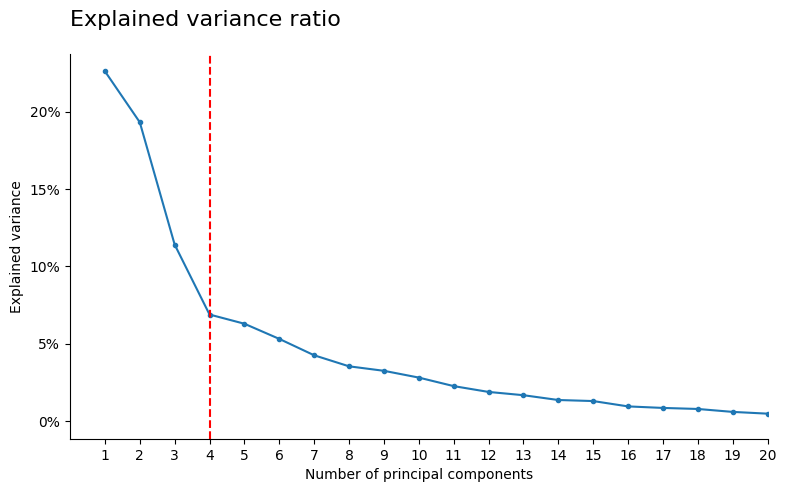

In [235]:
fig, ax = plt.subplots(figsize=(9, 5))
x_values = [i+1 for i in range(len(pca.explained_variance_ratio_))]
y_values = pca.explained_variance_ratio_
ax.plot(x_values, y_values, '.-')
ax.set_title("Explained variance ratio", loc="left", pad=20, fontsize=16)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xticks(x_values)
ax.set_xticklabels(x_values)
ax.set_yticklabels([f"{round(tick*100)}%" for tick in ax.get_yticks()])
ax.set_xlabel("Number of principal components")
ax.set_ylabel("Explained variance")
ax.set_xlim(0,20)


n_components_to_keep = 4

# Vertical red line to mark the chosen number of components.
ax.axvline(x=n_components_to_keep, color='r', linestyle='--')
plt.show()

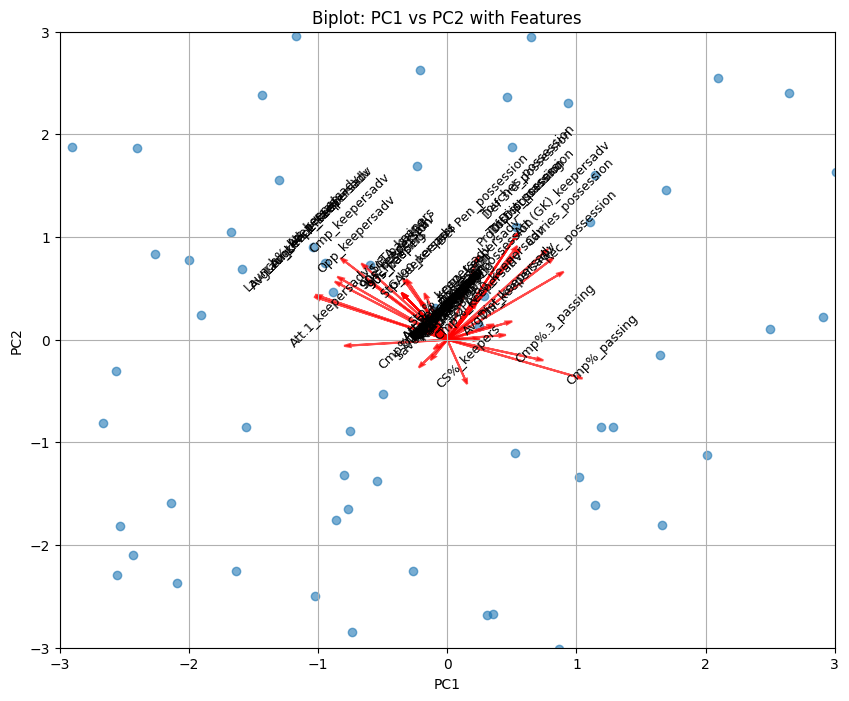

In [236]:
n_components_to_keep = 4

#Now use n_components_to_keep in your biplot
pca = decomposition.PCA(n_components=n_components_to_keep)
pca_values_teams = pca.fit_transform(X_teams_scaled)

pc1 = pca_values_teams[:, 0]
pc2 = pca_values_teams[:, 1]
fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter(pc1, pc2, alpha=0.6, label='Teams')
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_title("Biplot: PC1 vs PC2 with Features")
ax.grid(True)
ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3)


components = pca.components_
# Adjust for the number of components
components_scaled = components[:2] / np.max(np.abs(components[:2]), axis=1)[:, np.newaxis]
for i, feature in enumerate(X_teams.columns):
    # Draw arrows
    ax.arrow(0, 0, components_scaled[0, i], components_scaled[1, i],
             color='red', alpha=0.7, head_width=0.03, head_length=0.05, lw=1.5)
    # Annotate feature labels
    ax.text(components_scaled[0, i] * 1.2, components_scaled[1, i] * 1.2, feature,
            color='black', fontsize=9, ha='center', rotation=45)
plt.show()

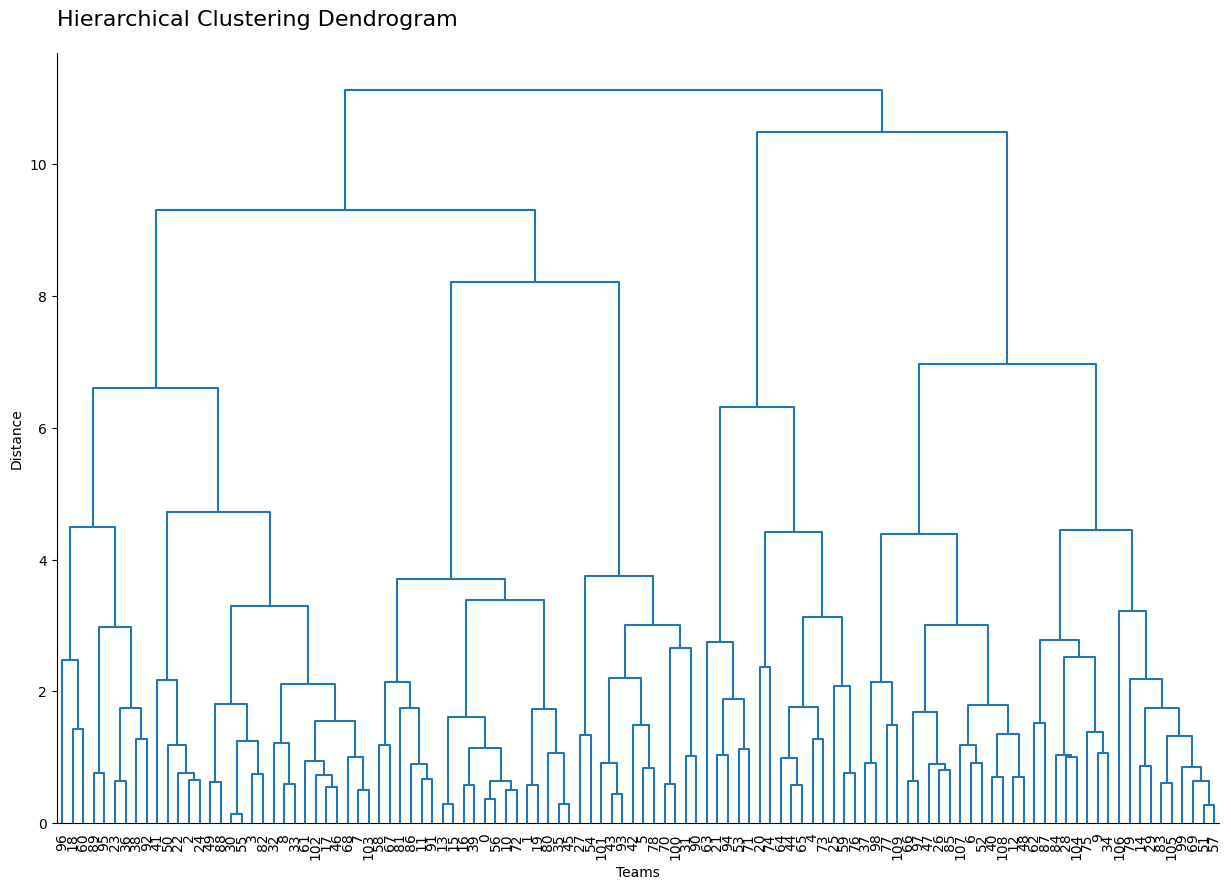

In [237]:
# Hierarchical Clustering
df_grouped = pd.DataFrame(pca_values_teams) # Use the PCA values for clustering
df_grouped = df_grouped.replace([np.inf, -np.inf], np.nan)
df_grouped = df_grouped.fillna(0)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_grouped)

distances_teams = hierarchy.distance.pdist(X_scaled)
linkage_matrix_teams = hierarchy.linkage(distances_teams, 'ward')

fig, ax = plt.subplots(figsize=(15, 10))
dendrogram_teams = hierarchy.dendrogram(
    linkage_matrix_teams,
    labels=df.index.tolist(), # Use original df index for labels if available
    ax=ax,
    leaf_rotation=90,
    leaf_font_size=10,
    color_threshold=0
)
ax.set_title("Hierarchical Clustering Dendrogram", loc="left", pad=20, fontsize=16)
ax.set_xlabel("Teams") # Assuming each row represents a team after dropping 'Player' column
ax.set_ylabel("Distance")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

In [238]:
import heapq as hq

def get_centroids(linkage_matrix_teams, pca_values_teams, n_clusters):
    cluster_labels = hierarchy.cut_tree(linkage_matrix_teams, n_clusters=n_clusters).flatten()
    centroids = []
    for cluster_id in range(n_clusters):
        cluster_indices = np.argwhere(cluster_labels == cluster_id).flatten()
        cluster_points = pca_values_teams[cluster_indices]
        centroids.append(cluster_points.mean(axis=0))
    return np.array(centroids)

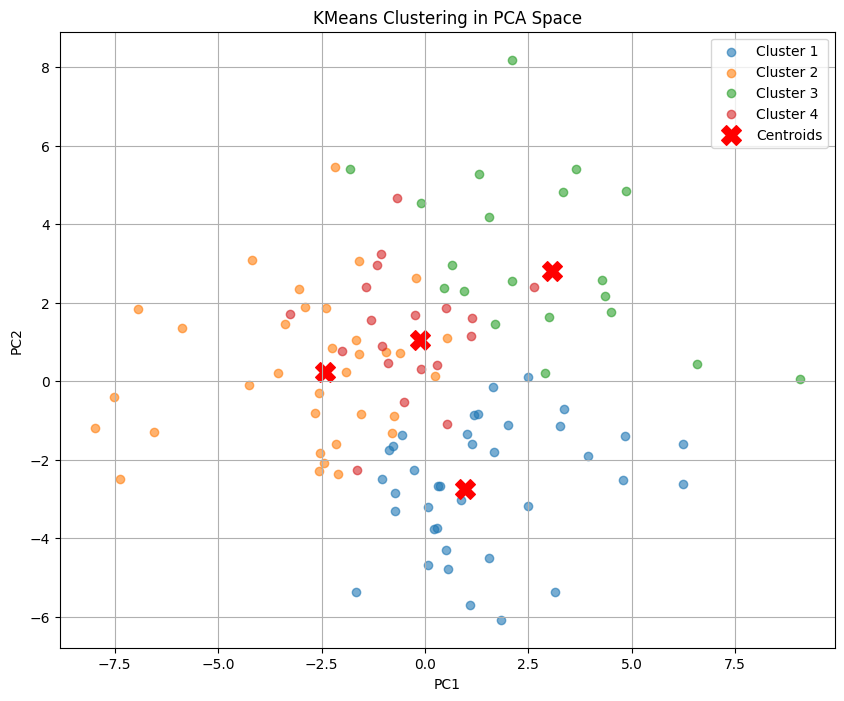

In [239]:
n_clusters = 4
centroids = get_centroids(linkage_matrix_teams, pca_values_teams, n_clusters)

# Run KMeans with centroids as initialization
kmeans = KMeans(n_clusters=n_clusters, init=centroids, n_init=1, random_state=42)
kmeans.fit(pca_values_teams[:,:n_components_to_keep])
kmeans_labels = kmeans.labels_

# Scatter plot with different colors for each cluster
fig, ax = plt.subplots(figsize=(10, 8))
for cluster_id in range(n_clusters):
    cluster_points = pca_values_teams[kmeans_labels == cluster_id, :2]
    ax.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f"Cluster {cluster_id + 1}", alpha=0.6)
# Plot the centroids
ax.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label="Centroids")
# Add labels and legend
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_title("KMeans Clustering in PCA Space")
ax.legend()
ax.grid()
plt.show()

In [240]:
def cluster_stats(df, pca_values_teams, kmeans_labels, n_clusters):
  """
  Calculates and prints statistics for each cluster.
  """
  for cluster_id in range(n_clusters):
      cluster_indices = np.where(kmeans_labels == cluster_id)[0]
      cluster_data = df.iloc[cluster_indices]  # Get data for current cluster

      # Calculate and print statistics
      print(f"Cluster {cluster_id + 1}:")
      print(f"Number of data points: {len(cluster_data)}")
      # Calculate statistics for each column (numeric only). Replace 'your_numeric_columns' with actual column names.
      numeric_columns = cluster_data.select_dtypes(include=np.number).columns
      if not numeric_columns.empty: #only prints stats if there are numeric columns in the dataset
          print(cluster_data[numeric_columns].describe())
      print("-" * 20)

# Example usage (assuming n_clusters is already defined):
cluster_stats(df, pca_values_teams, kmeans_labels, n_clusters)

Cluster 1:
Number of data points: 37
       90s_keepers  GA90_keepers  SoTA_keepers  Save%_keepers  CS%_keepers  \
count    37.000000     37.000000     37.000000      37.000000    37.000000   
mean     12.218919      1.276216      3.774324      69.102703    30.137838   
std       3.901270      0.397166      0.890753       6.803695    13.873203   
min       5.500000      0.710000      2.166667      53.800000     0.000000   
25%       8.000000      0.940000      3.125000      63.000000    18.800000   
50%      13.000000      1.200000      3.600000      70.800000    28.600000   
75%      15.500000      1.410000      4.250000      74.300000    37.500000   
max      18.000000      2.250000      6.000000      81.500000    57.100000   

       90s_keepersadv  FK_keepersadv  CK_keepersadv  OG_keepersadv  \
count       37.000000      37.000000      37.000000      37.000000   
mean        12.218919       0.012312       0.147633       0.036890   
std          3.901270       0.030332       0.10312

In [241]:
def list_players_per_cluster(df, kmeans_labels, n_clusters):
    """
    Lists players belonging to each cluster.
    """
    for cluster_id in range(n_clusters):
        cluster_indices = np.where(kmeans_labels == cluster_id)[0]
        cluster_players = df.iloc[cluster_indices]['Player'].tolist() # Access 'Player' column
        print(f"Cluster {cluster_id + 1}:")
        print(", ".join(cluster_players)) #prints players separated by commas
        print("-" * 20)

# Example usage (assuming n_clusters is already defined):
list_players_per_cluster(df, kmeans_labels, n_clusters)

Cluster 1:
Alisson, Kepa Arrizabalaga, Emil Audero, Marco Carnesecchi, Lucas Chevalier, Diego Conde, Thibaut Courtois, Arthur Desmas, Michele Di Gregorio, Gianluigi Donnarumma, Ederson, Fraser Forster, Paulo Gazzaniga, Pierluigi Gollini, Vicente Guaita, Péter Gulácsi, Lukáš Hrádecký, Jesse Joronen, Caoimhín Kelleher, Philipp Köhn, Radosław Majecki, Steve Mandanda, Alex Meret, Jan Oblak, Stefan Ortega, Lucas Perri, Federico Ravaglia, Pepe Reina, Guillaume Restes, Brice Samba, Alen Sherri, Rui Silva, Łukasz Skorupski, Yann Sommer, Marc-André ter Stegen, Kevin Trapp, Guglielmo Vicario
--------------------
Cluster 2:
Julen Agirrezabala, Alphonse Areola, Augusto Batalla, Marco Bizot, Yehvann Diouf, Marko Dmitrović, Patrick Drewes, Łukasz Fabiański, Wladimiro Falcone, Álvaro Fernández, Yahia Fofana, David de Gea, Kamil Grabara, Dominik Greif, Dean Henderson, Sergio Herrera, Nediljko Labrović, Alban Lafont, Nicola Leali, Benjamin Lecomte, Donovan Léon, Giorgi Mamardashvili, Lorenzo Montipò, Ø

In [242]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.cluster import KMeans
from scipy.cluster import hierarchy


def feature_importance_per_cluster(df, pca_values_teams, kmeans_labels, n_clusters, n_components_to_keep, pca):
    """
    Calculates and prints feature importance for each cluster.
    """
    for cluster_id in range(n_clusters):
        cluster_indices = np.where(kmeans_labels == cluster_id)[0]
        cluster_data = df.iloc[cluster_indices]
        print(f"\nCluster {cluster_id + 1}:")

        # Calculate the mean of PCA components for the cluster
        cluster_pca_means = np.mean(pca_values_teams[cluster_indices, :n_components_to_keep], axis=0)

        # Project the cluster means back to the original feature space using the inverse transform
        cluster_feature_importance = pca.inverse_transform([cluster_pca_means])

        # Normalize and print feature importance
        feature_importance_normalized = cluster_feature_importance / np.sum(np.abs(cluster_feature_importance))
        top_features = np.argsort(np.abs(feature_importance_normalized[0]))[::-1]  # Sort by absolute value
        top_features_names = [df.drop(columns=['Player']).columns[i] for i in top_features]
        top_features_values = [feature_importance_normalized[0][i] for i in top_features]

        for i in range(len(top_features_names)):
            print(f"{top_features_names[i]}: {top_features_values[i]:.4f}")

# Example Usage (Make sure all necessary variables are defined)
feature_importance_per_cluster(df, pca_values_teams, kmeans_labels, n_clusters, n_components_to_keep, pca)


Cluster 1:
Att_keepersadv: -0.0586
Cmp_keepersadv: -0.0523
AvgLen.1_keepersadv: -0.0520
Launch%.1_keepersadv: -0.0499
AvgLen_keepersadv: -0.0467
Launch%_keepersadv: -0.0458
Cmp%_passing: 0.0436
Opp_keepersadv: -0.0403
1/3_passing: -0.0382
90s_keepers: -0.0360
90s_keepersadv: -0.0360
90s_passing: -0.0360
90s_possession: -0.0360
Touches_possession: -0.0359
Def 3rd_possession: -0.0351
SoTA_keepers: -0.0319
TotDist_passing: -0.0314
Def Pen_possession: -0.0298
TotDist_possession: -0.0284
PrgDist_possession: -0.0263
Cmp%.3_passing: 0.0258
Att (GK)_keepersadv: -0.0231
Stp_keepersadv: -0.0220
GA90_keepers: -0.0202
CS%_keepers: 0.0195
Carries_possession: -0.0176
#OPA_keepersadv: -0.0156
Att.1_keepersadv: -0.0155
Rec_possession: -0.0093
Mid 3rd_possession: -0.0087
Cmp%.1_passing: 0.0078
Stp%_keepersadv: -0.0063
AvgDist_keepersadv: 0.0050
Thr_keepersadv: 0.0049
Cmp%_keepersadv: 0.0037
Save%_keepers: 0.0031
#OPA/90_keepersadv: -0.0012
Dis_possession: 0.0003
Cmp%.2_passing: -0.0000
FK_keepersadv: 

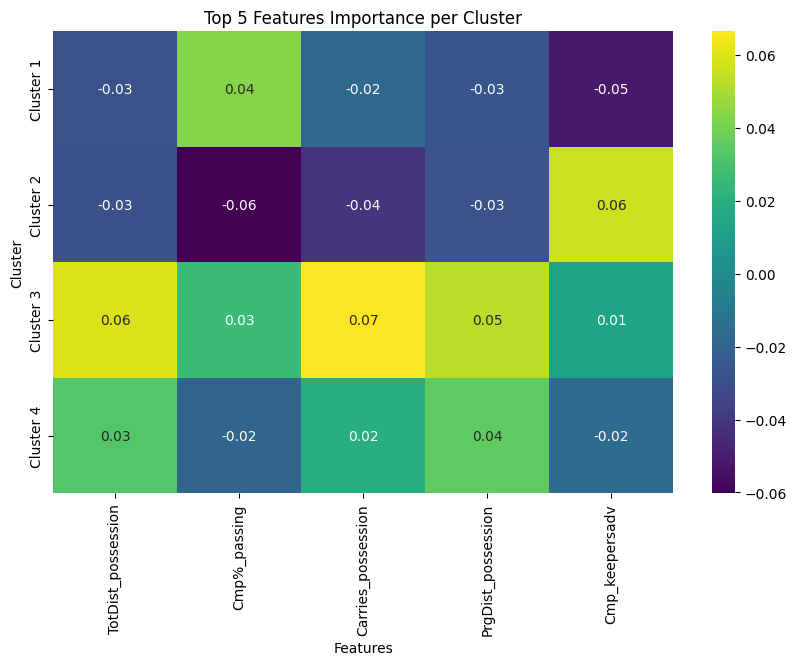

In [243]:
def top_features_heatmap(df, pca_values_teams, kmeans_labels, n_clusters, n_components_to_keep, pca):
    """
    Calculates top features overall and creates a heatmap of their importance in each cluster.
    """
    feature_importance_all_clusters = {}
    for cluster_id in range(n_clusters):
        cluster_indices = np.where(kmeans_labels == cluster_id)[0]
        cluster_data = df.iloc[cluster_indices]

        # Calculate the mean of PCA components for the cluster
        cluster_pca_means = np.mean(pca_values_teams[cluster_indices, :n_components_to_keep], axis=0)

        # Project the cluster means back to the original feature space using the inverse transform
        cluster_feature_importance = pca.inverse_transform([cluster_pca_means])

        # Normalize feature importance
        feature_importance_normalized = cluster_feature_importance / np.sum(np.abs(cluster_feature_importance))
        feature_importance_all_clusters[cluster_id] = feature_importance_normalized[0]

    #Sum the importance of all features across clusters
    overall_importance = np.sum(np.abs(np.array(list(feature_importance_all_clusters.values()))), axis = 0)

    #find the top 5 features overall
    top_5_features_indices = np.argsort(overall_importance)[::-1][:5]
    top_5_features = [df.drop(columns=['Player']).columns[i] for i in top_5_features_indices]

    # Create the heatmap data
    heatmap_data = []
    for cluster_id in range(n_clusters):
      cluster_importance = feature_importance_all_clusters[cluster_id]
      cluster_top_5 = [cluster_importance[i] for i in top_5_features_indices]
      heatmap_data.append(cluster_top_5)

    import matplotlib.pyplot as plt
    import seaborn as sns

    plt.figure(figsize=(10, 6))
    sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap="viridis",
                xticklabels=top_5_features, yticklabels=[f"Cluster {i+1}" for i in range(n_clusters)])
    plt.title("Top 5 Features Importance per Cluster")
    plt.xlabel("Features")
    plt.ylabel("Cluster")
    plt.show()

# Call the function (assuming other variables are defined as in your code):
top_features_heatmap(df, pca_values_teams, kmeans_labels, n_clusters, n_components_to_keep, pca)

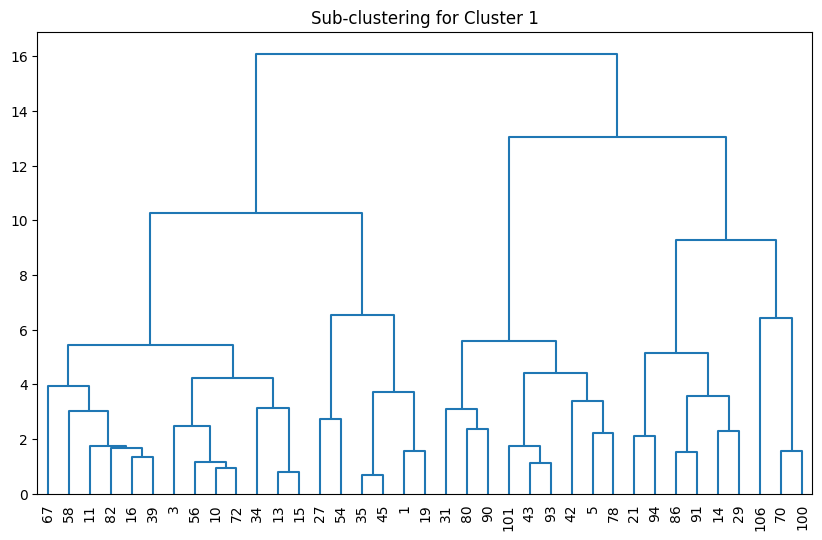


Sub-Cluster 1 within Cluster 1:
Alisson, Gianluigi Donnarumma, Fraser Forster, Péter Gulácsi, Philipp Köhn, Radosław Majecki

Sub-Cluster 2 within Cluster 1:
Kepa Arrizabalaga, Marco Carnesecchi, Lucas Chevalier, Diego Conde, Arthur Desmas, Michele Di Gregorio, Vicente Guaita, Lukáš Hrádecký, Steve Mandanda, Alex Meret, Jan Oblak, Lucas Perri, Guillaume Restes

Sub-Cluster 3 within Cluster 1:
Emil Audero, Pierluigi Gollini, Jesse Joronen, Caoimhín Kelleher, Federico Ravaglia, Pepe Reina, Alen Sherri, Łukasz Skorupski, Kevin Trapp

Sub-Cluster 4 within Cluster 1:
Thibaut Courtois, Ederson, Paulo Gazzaniga, Stefan Ortega, Brice Samba, Rui Silva, Yann Sommer, Marc-André ter Stegen, Guglielmo Vicario


In [244]:
def sub_clustering(df, pca_values_teams, kmeans_labels, n_clusters):
    """
    Performs sub-clustering within the largest cluster.
    """
    # Find the largest cluster
    cluster_sizes = np.bincount(kmeans_labels)
    largest_cluster_id = np.argmax(cluster_sizes)
    largest_cluster_indices = np.where(kmeans_labels == largest_cluster_id)[0]

    if len(largest_cluster_indices) <= 1:
      print("The largest cluster has only one or zero elements, subclustering is not possible.")
      return

    # Extract data points from the largest cluster
    largest_cluster_data = pca_values_teams[largest_cluster_indices]

    # Perform sub-clustering using hierarchical clustering
    distances_subcluster = hierarchy.distance.pdist(largest_cluster_data)
    linkage_matrix_subcluster = hierarchy.linkage(distances_subcluster, 'ward')


    # Determine the optimal number of subclusters (example: 2 subclusters)
    n_subclusters = 4
    # Cut the dendrogram to get subcluster labels
    subcluster_labels = hierarchy.cut_tree(linkage_matrix_subcluster, n_clusters=n_subclusters).flatten()

    # Visualize the subclusters (optional)
    plt.figure(figsize=(10, 6))
    hierarchy.dendrogram(linkage_matrix_subcluster,
                         labels=df.iloc[largest_cluster_indices].index.tolist(),  # Use indices for labels
                         leaf_rotation=90,
                         leaf_font_size=10,
                         color_threshold=0)  # Set color threshold to 0 to visualize all clusters
    plt.title(f"Sub-clustering for Cluster {largest_cluster_id + 1}")
    plt.show()

    # Print players in each subcluster
    for subcluster_id in range(n_subclusters):
        subcluster_indices = np.where(subcluster_labels == subcluster_id)[0]
        subcluster_players = df.iloc[largest_cluster_indices[subcluster_indices]]['Player'].tolist()
        print(f"\nSub-Cluster {subcluster_id + 1} within Cluster {largest_cluster_id + 1}:")
        print(", ".join(subcluster_players))


# Example usage (after k-means clustering)
sub_clustering(df, pca_values_teams, kmeans_labels, n_clusters)

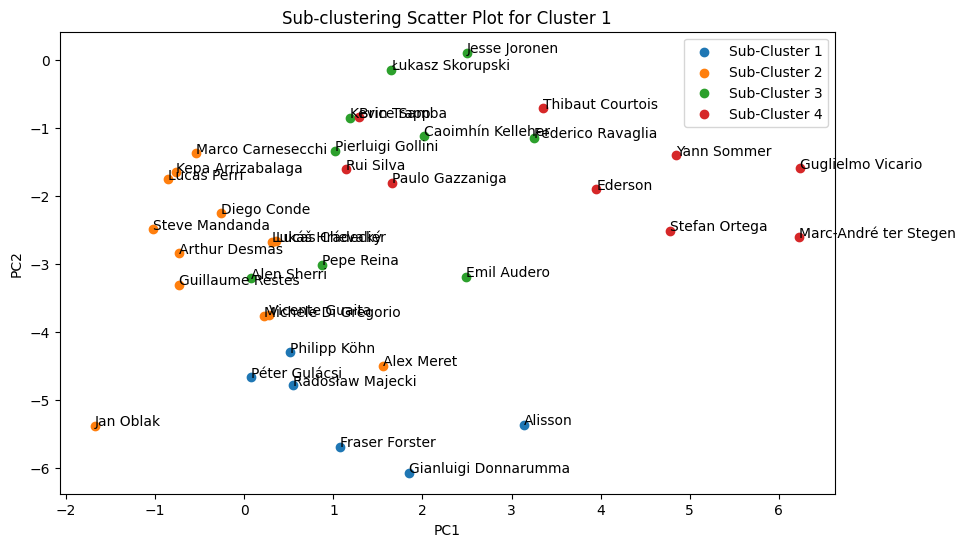

In [251]:
# prompt: repeat the sub_clustering_scatter plot with player names

def sub_clustering_scatter(df, pca_values_teams, kmeans_labels, n_clusters):
    """
    Performs sub-clustering within the largest cluster and creates a scatter plot with player names.
    """
    # Find the largest cluster
    cluster_sizes = np.bincount(kmeans_labels)
    largest_cluster_id = np.argmax(cluster_sizes)
    largest_cluster_indices = np.where(kmeans_labels == largest_cluster_id)[0]

    if len(largest_cluster_indices) <= 1:
      print("The largest cluster has only one or zero elements, subclustering is not possible.")
      return

    # Extract data points from the largest cluster
    largest_cluster_data = pca_values_teams[largest_cluster_indices]

    # Perform sub-clustering using hierarchical clustering
    distances_subcluster = hierarchy.distance.pdist(largest_cluster_data)
    linkage_matrix_subcluster = hierarchy.linkage(distances_subcluster, 'ward')

    # Determine the optimal number of subclusters
    n_subclusters = 4

    # Cut the dendrogram to get subcluster labels
    subcluster_labels = hierarchy.cut_tree(linkage_matrix_subcluster, n_clusters=n_subclusters).flatten()

    # Scatter plot of subclusters with player names
    plt.figure(figsize=(10, 6))
    for subcluster_id in range(n_subclusters):
        subcluster_indices = np.where(subcluster_labels == subcluster_id)[0]
        subcluster_points = largest_cluster_data[subcluster_indices]
        player_names = df.iloc[largest_cluster_indices[subcluster_indices]]['Player'].tolist()
        for i, txt in enumerate(player_names):
            plt.annotate(txt, (subcluster_points[i, 0], subcluster_points[i, 1]))
        plt.scatter(subcluster_points[:, 0], subcluster_points[:, 1], label=f"Sub-Cluster {subcluster_id + 1}")

    plt.title(f"Sub-clustering Scatter Plot for Cluster {largest_cluster_id + 1}")
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.legend()
    plt.show()
sub_clustering_scatter(df, pca_values_teams, kmeans_labels, n_clusters)

In [246]:
def feature_importance_per_subcluster(df, pca_values_teams, kmeans_labels, n_clusters, n_components_to_keep, pca):
    """
    Calculates and prints feature importance for each subcluster within the largest cluster.
    """
    # Find the largest cluster
    cluster_sizes = np.bincount(kmeans_labels)
    largest_cluster_id = np.argmax(cluster_sizes)
    largest_cluster_indices = np.where(kmeans_labels == largest_cluster_id)[0]

    if len(largest_cluster_indices) <= 1:
        print("The largest cluster has only one or zero elements, subclustering is not possible.")
        return

    largest_cluster_data = pca_values_teams[largest_cluster_indices]

    distances_subcluster = hierarchy.distance.pdist(largest_cluster_data)
    linkage_matrix_subcluster = hierarchy.linkage(distances_subcluster, 'ward')

    n_subclusters = 4
    subcluster_labels = hierarchy.cut_tree(linkage_matrix_subcluster, n_clusters=n_subclusters).flatten()

    for subcluster_id in range(n_subclusters):
        subcluster_indices = np.where(subcluster_labels == subcluster_id)[0]
        subcluster_data_indices = largest_cluster_indices[subcluster_indices]
        subcluster_data = df.iloc[subcluster_data_indices]

        print(f"\nSub-Cluster {subcluster_id + 1} within Cluster {largest_cluster_id + 1}:")

        # Calculate the mean of PCA components for the subcluster
        subcluster_pca_means = np.mean(pca_values_teams[subcluster_data_indices, :n_components_to_keep], axis=0)

        # Project the subcluster means back to the original feature space
        subcluster_feature_importance = pca.inverse_transform([subcluster_pca_means])

        # Normalize and print feature importance
        feature_importance_normalized = subcluster_feature_importance / np.sum(np.abs(subcluster_feature_importance))
        top_features = np.argsort(np.abs(feature_importance_normalized[0]))[::-1]
        top_features_names = [df.drop(columns=['Player']).columns[i] for i in top_features]
        top_features_values = [feature_importance_normalized[0][i] for i in top_features]

        for i in range(min(3, len(top_features_names))): # Print top 3 features
            print(f"{top_features_names[i]}: {top_features_values[i]:.4f}")

# Example usage
feature_importance_per_subcluster(df, pca_values_teams, kmeans_labels, n_clusters, n_components_to_keep, pca)


Sub-Cluster 1 within Cluster 1:
Att_keepersadv: -0.0498
Cmp_keepersadv: -0.0477
Touches_possession: -0.0454

Sub-Cluster 2 within Cluster 1:
Def 3rd_possession: -0.0651
Touches_possession: -0.0645
Def Pen_possession: -0.0578

Sub-Cluster 3 within Cluster 1:
90s_keepers: -0.0894
90s_keepersadv: -0.0894
90s_passing: -0.0894

Sub-Cluster 4 within Cluster 1:
Cmp%_passing: 0.0647
Launch%_keepersadv: -0.0625
AvgLen_keepersadv: -0.0620


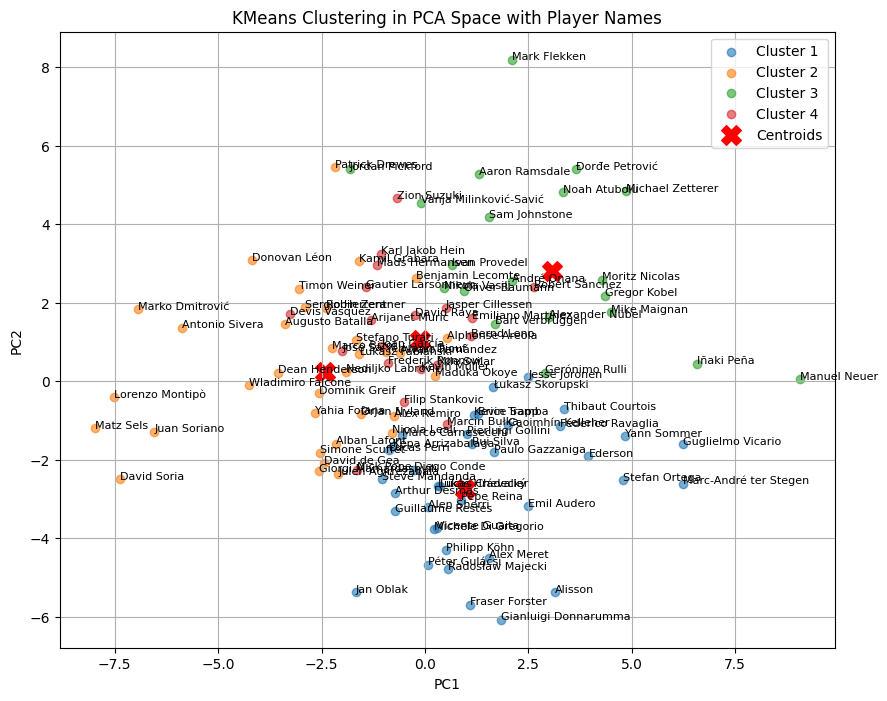

In [247]:
fig, ax = plt.subplots(figsize=(10, 8))
for cluster_id in range(n_clusters):
    cluster_points = pca_values_teams[kmeans_labels == cluster_id, :2]
    cluster_players = df[kmeans_labels == cluster_id]['Player'].values  # Get player names
    for i, player in enumerate(cluster_players):
        ax.annotate(player, (cluster_points[i, 0], cluster_points[i, 1]), fontsize=8) # Annotate each point with player name
    ax.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f"Cluster {cluster_id + 1}", alpha=0.6)

# Plot the centroids
ax.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label="Centroids")

# Add labels and legend
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_title("KMeans Clustering in PCA Space with Player Names")
ax.legend()
ax.grid()
plt.show()

In [248]:

import numpy as np

def most_similar_players(df, pca_values_teams, target_players):
    """
    Finds the most similar players to a given list of target players based on their PCA values.

    Args:
        df: The DataFrame containing player data.
        pca_values_teams: The PCA-transformed player data.
        target_players: A list of target player names.

    Returns:
        A dictionary where keys are target player names and values are lists of the top 5 most similar players.
    """

    player_indices = {player: i for i, player in enumerate(df['Player'])}
    similarity_scores = {}

    for target_player in target_players:
        try:
          target_index = player_indices[target_player]
          target_pca = pca_values_teams[target_index]

          distances = np.linalg.norm(pca_values_teams - target_pca, axis=1)
          # Exclude the target player itself from the similarity calculation
          distances[target_index] = np.inf

          top_indices = np.argsort(distances)[:5]
          similar_players = [df['Player'].iloc[i] for i in top_indices]
          similarity_scores[target_player] = similar_players
        except KeyError:
          print(f"Player '{target_player}' not found in the dataset.")
          similarity_scores[target_player] = [] #or handle it in a different way

    return similarity_scores

# Example usage (assuming df and pca_values_teams are defined as in your original code)
target_players = ["Manuel Neuer", "Thibaut Courtois", "Gianluigi Donnarumma", "Gregor Kobel", "Alisson"]  # Add your top player here

similarity_results = most_similar_players(df, pca_values_teams, target_players)

for player, similar_players in similarity_results.items():
    print(f"Top 5 most similar players to {player}: {similar_players}")

Top 5 most similar players to Manuel Neuer: ['Iñaki Peña', 'Yann Sommer', 'Mike Maignan', 'Ederson', 'Gregor Kobel']
Top 5 most similar players to Thibaut Courtois: ['Gerónimo Rulli', 'Paulo Gazzaniga', 'Bart Verbruggen', 'Bernd Leno', 'Rui Silva']
Top 5 most similar players to Gianluigi Donnarumma: ['Alisson', 'Péter Gulácsi', 'Philipp Köhn', 'Alex Meret', 'Michele Di Gregorio']
Top 5 most similar players to Gregor Kobel: ['Alexander Nübel', 'Moritz Nicolas', 'Mike Maignan', 'Gerónimo Rulli', 'Noah Atubolu']
Top 5 most similar players to Alisson: ['Gianluigi Donnarumma', 'Alex Meret', 'Philipp Köhn', 'Péter Gulácsi', 'Michele Di Gregorio']
